<a href="https://colab.research.google.com/github/mahtabtech/Interpolation-in-Image-Processing/blob/main/interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interplotion:**
In image processing and object detection, the purpose of interpolation methods is to resize images while maintaining their quality as much as possible. When you need to make an image smaller or larger (like fitting it to a specific size required by a model or algorithm), interpolation methods help estimate new pixel values to fill in the gaps or reduce the size without losing too much detail.

For example: Resizing Images for Models: Object detection models often require input images to be of a certain size. Interpolation methods ensure the image is resized correctly while trying to keep important features (like edges and details) intact, which helps the model detect objects more accurately.
In simple terms, interpolation methods help make images bigger or smaller while trying to keep them looking as clear and detailed as possible.

**Code:**

This script demonstrates resizing a 4x4 grayscale image using two interpolation methods—nearest-neighbor and bilinear interpolation—via PyTorch. It creates an example image tensor and resizes it to 8x8 using both interpolation methods. The nearest-neighbor method produces a blocky, pixelated result by copying the value of the nearest pixel, while the bilinear method provides smoother transitions between pixels by averaging the values of the surrounding pixels. Finally, the results of both methods are visualized side by side using Matplotlib to compare their effects on the image quality.

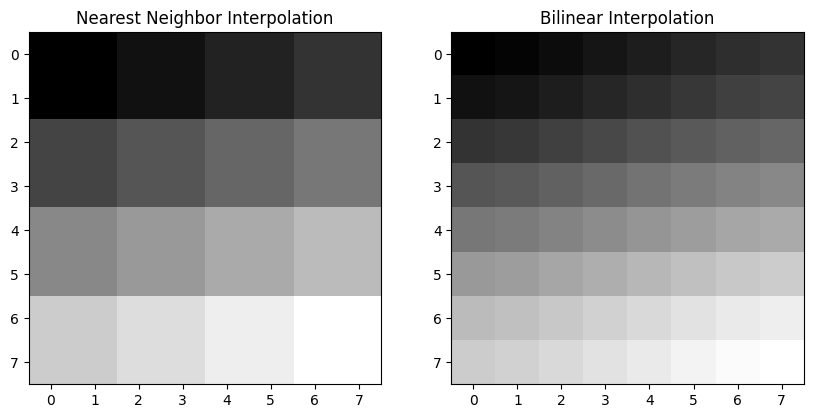

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Example image tensor of shape (1, 1, 4, 4) - a 4x4 grayscale image
image_tensor = torch.tensor([[[[1, 2, 3, 4],
                               [5, 6, 7, 8],
                               [9, 10, 11, 12],
                               [13, 14, 15, 16]]]], dtype=torch.float32)

# Resize the image to 8x8 using nearest-neighbor interpolation
resized_nearest = F.interpolate(image_tensor, size=(8, 8), mode='nearest')

# Resize the image to 8x8 using bilinear interpolation
resized_bilinear = F.interpolate(image_tensor, size=(8, 8), mode='bilinear', align_corners=False)

# Convert tensors to numpy for visualization
resized_nearest_np = resized_nearest.numpy().squeeze()
resized_bilinear_np = resized_bilinear.numpy().squeeze()

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(resized_nearest_np, cmap='gray')
ax[0].set_title('Nearest Neighbor Interpolation')
ax[1].imshow(resized_bilinear_np, cmap='gray')
ax[1].set_title('Bilinear Interpolation')
plt.show()

# **Another example for 3 methods: Nearest Neighbor, Bilinear, and Bicubic**

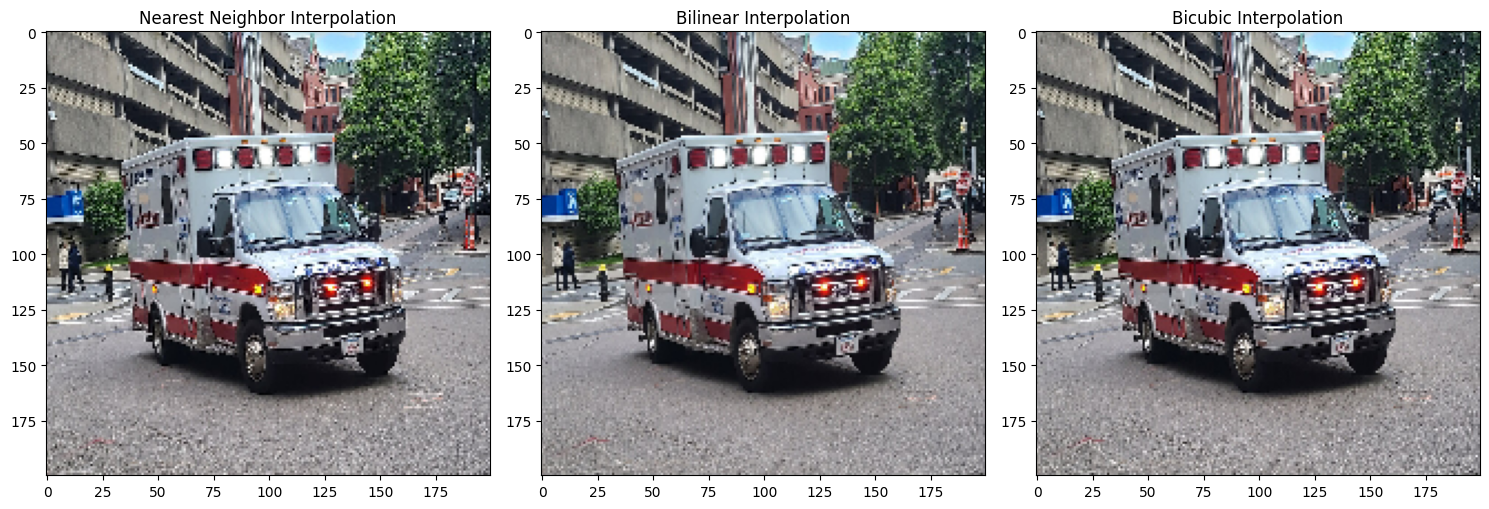

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the image from the local file path in the Colab environment
image_path = '/content/Armstrong_Ambulance_P17.jpg'  # Replace with your actual image path

# Open the image using PIL
image = Image.open(image_path)

# Convert the image to RGB if it is not already
image = image.convert('RGB')

# Convert the image to a PyTorch tensor and normalize to the range [0, 1]
image_tensor = torch.from_numpy(np.array(image)).permute(2, 0, 1).unsqueeze(0).float() / 255.0

# Resize the image to 256x256 using different interpolation methods
resized_nearest = F.interpolate(image_tensor, size=(200, 200), mode='nearest')
resized_bilinear = F.interpolate(image_tensor, size=(200, 200), mode='bilinear', align_corners=False)
resized_bicubic = F.interpolate(image_tensor, size=(200, 200), mode='bicubic', align_corners=False)

# Convert tensors to numpy for visualization
resized_nearest_np = resized_nearest.squeeze().permute(1, 2, 0).numpy()
resized_bilinear_np = resized_bilinear.squeeze().permute(1, 2, 0).numpy()
resized_bicubic_np = resized_bicubic.squeeze().permute(1, 2, 0).numpy()

# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(resized_nearest_np)
ax[0].set_title('Nearest Neighbor Interpolation')
ax[1].imshow(resized_bilinear_np)
ax[1].set_title('Bilinear Interpolation')
ax[2].imshow(resized_bicubic_np)
ax[2].set_title('Bicubic Interpolation')

plt.tight_layout()
plt.show()